In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Final Data2.csv")

# Initial Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   havingIP         10000 non-null  int64 
 1   tinyURL          10000 non-null  int64 
 2   redirection      10000 non-null  int64 
 3   count_at         10000 non-null  int64 
 4   count_www        10000 non-null  int64 
 5   no_of_dir        10000 non-null  int64 
 6   count_https      10000 non-null  int64 
 7   count_http       10000 non-null  int64 
 8   count_per        10000 non-null  int64 
 9   count_hyphen     10000 non-null  int64 
 10  count_equal      10000 non-null  int64 
 11  url_length       10000 non-null  int64 
 12  hostname_length  10000 non-null  int64 
 13  digit_count      10000 non-null  int64 
 14  letter_count     10000 non-null  int64 
 15  dns              10000 non-null  int64 
 16  domainAge        10000 non-null  int64 
 17  domainEnd        10000 non-null 

In [4]:
df.head()

,havingIP,tinyURL,redirection,count_at,count_www,no_of_dir,count_https,count_http,count_per,count_hyphen,...,digit_count,letter_count,dns,domainAge,domainEnd,iframe,mouseOver,rightClick,forwarding,type
0,0,0,0,0,0,0,0,0,0,0,...,0,31,1,1,1,1,1,1,1,phishing
1,0,0,0,0,0,2,0,1,0,0,...,2,29,1,1,1,0,0,1,0,phishing
2,0,0,0,0,0,5,0,1,0,11,...,9,88,1,1,1,0,0,1,0,malware
3,0,1,0,0,0,0,0,0,0,1,...,0,14,1,1,1,1,1,1,1,phishing
4,0,0,0,0,1,2,0,1,0,6,...,0,41,1,1,1,1,1,1,1,defacement


In [5]:
# Label Encoding

In [6]:
def labelEncode(label):
    if(label == "benign"):
        return 0
    else:
        return 1

In [7]:
df["type"] = df["type"].apply(labelEncode)
df["type"].value_counts()

type
1    7500
0    2500
Name: count, dtype: int64

In [8]:
# Mutual information

In [9]:
from sklearn.feature_selection import mutual_info_classif
def get_mi_scores(x, y):
    mi_scores = mutual_info_classif(x, y,random_state=13)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = get_mi_scores(df.iloc[:,:-1], df["type"])
print(mi_scores[:13].index)
features = mi_scores[:13].index

Index(['count_http', 'hostname_length', 'count_www', 'forwarding',
       'count_equal', 'iframe', 'mouseOver', 'digit_count', 'no_of_dir',
       'count_hyphen', 'count_per', 'url_length', 'dns'],
      dtype='object')


In [10]:
mi_scores

count_http         0.175344
hostname_length    0.129796
count_www          0.088155
forwarding         0.031351
count_equal        0.028834
iframe             0.024605
mouseOver          0.023409
digit_count        0.020066
no_of_dir          0.018790
count_hyphen       0.018312
count_per          0.015293
url_length         0.011537
dns                0.010409
letter_count       0.009413
count_at           0.003620
domainAge          0.003578
domainEnd          0.000710
tinyURL            0.000000
count_https        0.000000
redirection        0.000000
rightClick         0.000000
havingIP           0.000000
Name: MI Scores, dtype: float64

In [11]:
# Correlation Matrix

In [12]:
# from matplotlib import pyplot as plt
# import seaborn as sns
# # Set the figure size
# plt.figure(figsize=(10, 8))
# # plotting correlation heatmap
# dataplot = sns.heatmap(df[mi_scores[:10].index].corr(), cmap="YlGnBu", annot=True)
  
# # displaying heatmap
# plt.show()

In [13]:
# train_test_split

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df[features].iloc[:,:-1], df["type"], test_size=0.2, random_state = 13)
print(x_train.shape,x_test.shape)

(8000, 12) (2000, 12)


In [15]:
# Standard Scaler

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

## Model 1

In [17]:
# Decision Tree

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

grid_param = {"criterion":["gini","entropy"],
             "splitter":["best","random"],
             "max_depth":range(2,20,1),
             "min_samples_leaf":range(1,15,1),
             "min_samples_split":range(2,20,1) 
            }

clf = DecisionTreeClassifier()
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train_scaled,y_train)
print("Best Score: ",grid_search.best_score_)
print("\nBest Parameters: ",grid_search.best_params_)
parameters = grid_search.best_params_

Best Score:  0.984375

Best Parameters:  {'criterion': 'entropy', 'max_depth': 14, 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'best'}


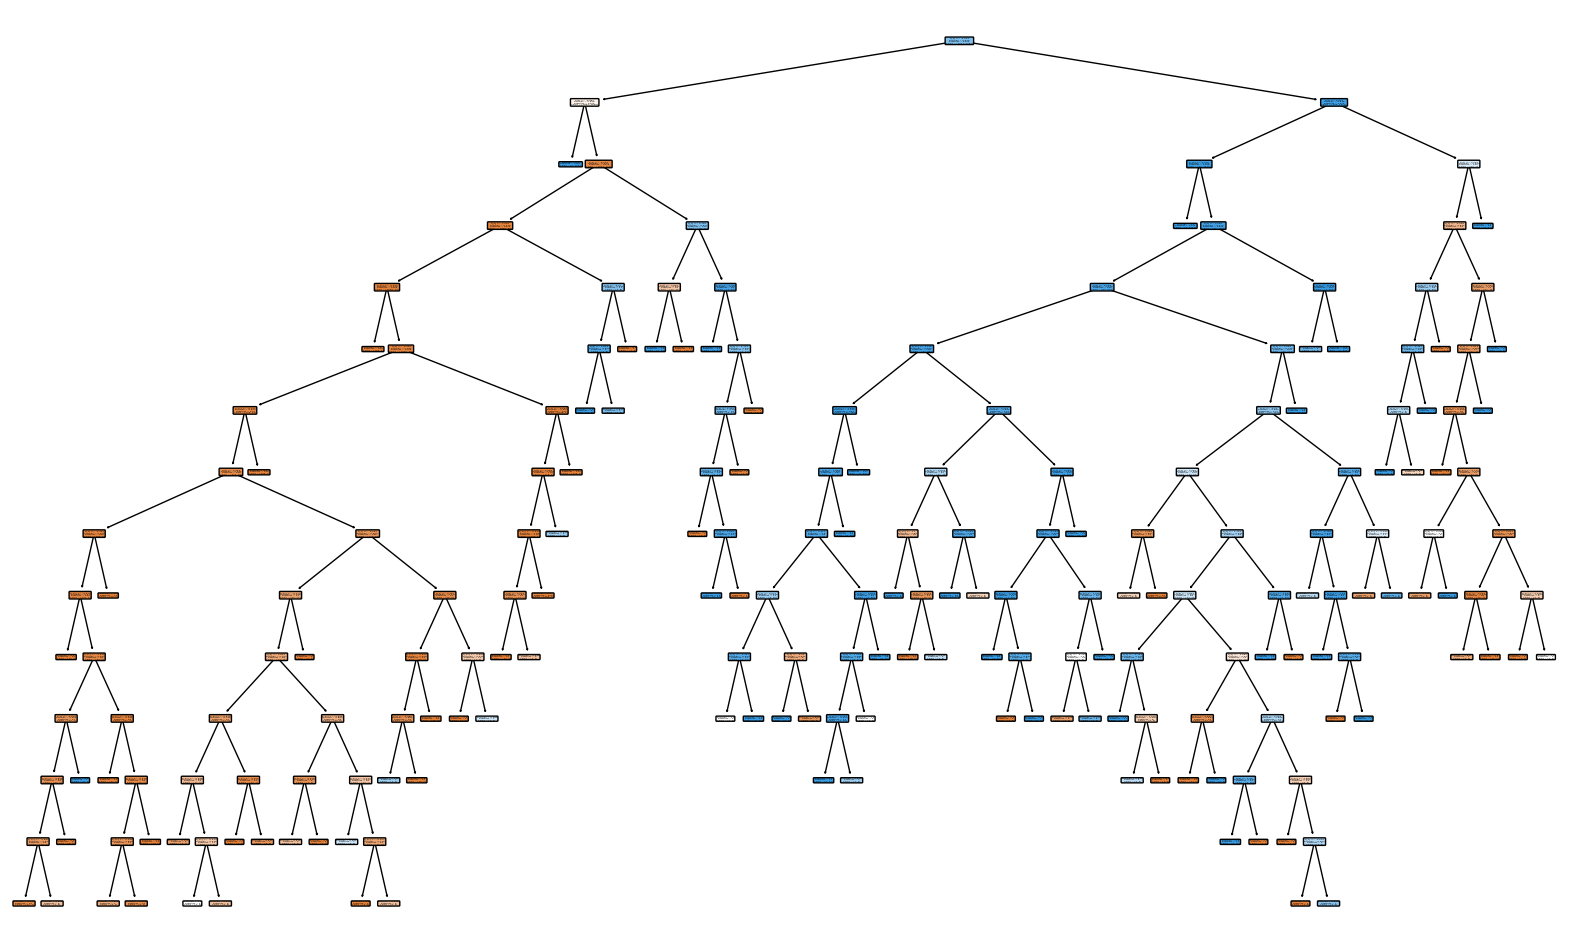

In [18]:
clf=DecisionTreeClassifier(criterion = parameters["criterion"],max_depth = parameters["max_depth"],min_samples_leaf = parameters["min_samples_leaf"],min_samples_split = parameters["min_samples_split"],splitter = parameters["splitter"])
clf.fit(x_train_scaled,y_train)
plt.figure(figsize=(20,12))
tree.plot_tree(clf,rounded=True,filled=True)
plt.show()

Accuracy Score:  0.978
F1 Score:  0.9855263157894736


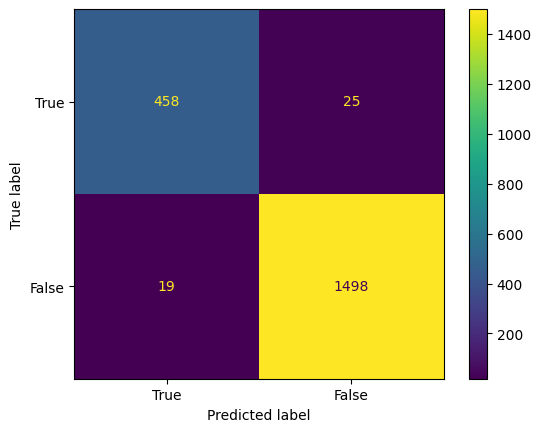

In [19]:
y_pred = clf.predict(x_test_scaled)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

cfm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cfm, display_labels = [True, False]).plot() 
print("F1 Score: ",f1_score(y_test,y_pred))

## Model 2

In [20]:
# Random Forest

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

grid_param={"n_estimators": [20,60,100,120],
             "max_features": [0.2,0.4,0.6,0.8,1.0],
             "max_depth": range(2,20,1),
             "min_samples_leaf": range(1,15,1),
             "min_samples_split": range(2,20,1) 
            }

clf = RandomForestClassifier(oob_score=True)
grid_search=RandomizedSearchCV(estimator=clf,param_distributions=grid_param,cv=5,n_jobs=-1)
grid_search.fit(x_train_scaled,y_train)
print("Best Score: ",grid_search.best_score_)
print("\nBest Parameters: ",grid_search.best_params_)
parameters = grid_search.best_params_

Best Score:  0.983375

Best Parameters:  {'n_estimators': 120, 'min_samples_split': 15, 'min_samples_leaf': 5, 'max_features': 1.0, 'max_depth': 11}


Accuracy Score:  0.9815
F1 Score:  0.9878329496876027


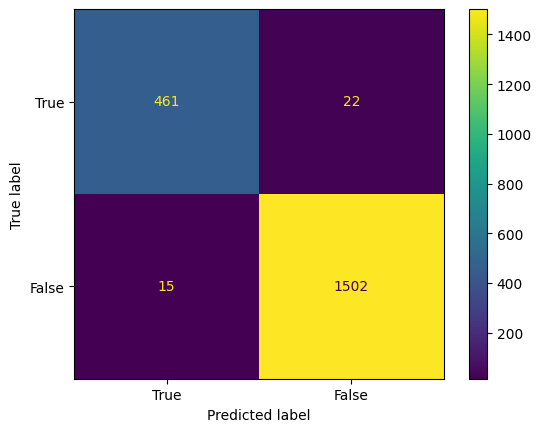

In [21]:
clf=RandomForestClassifier(n_estimators = parameters["n_estimators"],min_samples_split = parameters["min_samples_split"],min_samples_leaf = parameters["min_samples_leaf"],max_features = parameters["max_features"],max_depth = parameters["max_depth"])
clf.fit(x_train_scaled,y_train)
y_pred = clf.predict(x_test_scaled)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

cfm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cfm, display_labels = [True, False]).plot() 
print("F1 Score: ",f1_score(y_test,y_pred))

## Model 3

In [22]:
## Deep Learning Model

import tensorflow
import keras_tuner as kt
from tensorflow import keras
from keras import Sequential
from sklearn.metrics import f1_score
from keras.layers import Dense,Dropout, BatchNormalization

In [23]:
def build_model(hp): # hyperparameter
    
    model = Sequential()
    
    nodes = hp.Int("nodes",min_value = 64,max_value = 512)
    
    model.add(Dense(nodes,activation="relu", kernel_initializer="HeUniform",input_dim=12))
    model.add(Dropout(0.25))

    model.add(Dense(nodes,activation="relu", kernel_initializer="HeUniform"))
    model.add(Dropout(0.25))

    model.add(Dense(nodes,activation="relu", kernel_initializer="HeUniform"))
    model.add(Dropout(0.1))
    
    model.add(Dense(nodes,activation="relu", kernel_initializer="HeUniform"))
    model.add(Dropout(0.1))

    model.add(Dense(1,activation="sigmoid", kernel_initializer="HeUniform"))
    
    optimizers = hp.Choice("optimizer",values= ["adam","rmsprop","sgd","adadelta","nadam","adagrad"])
    
    model.compile(loss='binary_crossentropy', optimizer=optimizers ,metrics=['accuracy'])
      
    return model


In [24]:
early_stop = keras.callbacks.EarlyStopping(monitor = "val_loss", patience=3, restore_best_weights = True)

In [25]:
tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=5, directory = "Main_output")
tuner.search(x_train_scaled, y_train, epochs= 5, validation_split=0.2)

INFO:tensorflow:Reloading Tuner from Main_output\untitled_project\tuner0.json
INFO:tensorflow:Oracle triggered exit


In [26]:
model = tuner.get_best_models(num_models=1)[0]
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 397)               5161      
                                                                 
 dropout (Dropout)           (None, 397)               0         
                                                                 
 dense_1 (Dense)             (None, 397)               158006    
                                                                 
 dropout_1 (Dropout)         (None, 397)               0         
                                                                 
 dense_2 (Dense)             (None, 397)               158006    
                                                                 
 dropout_2 (Dropout)         (None, 397)               0         
                                                                 
 dense_3 (Dense)             (None, 397)               1

In [27]:
history = model.fit(x_train_scaled, y_train,epochs=20,initial_epoch=5,validation_split=0.2,verbose=1,callbacks=early_stop)

Epoch 6/20
200/200 [==============================] - 2s 4ms/step - loss: 0.2238 - accuracy: 0.9423 - val_loss: 0.0729 - val_accuracy: 0.9750
Epoch 7/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0819 - accuracy: 0.9756 - val_loss: 0.0662 - val_accuracy: 0.9775
Epoch 8/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0762 - accuracy: 0.9753 - val_loss: 0.0646 - val_accuracy: 0.9775
Epoch 9/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0711 - accuracy: 0.9772 - val_loss: 0.0594 - val_accuracy: 0.9806
Epoch 10/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0618 - accuracy: 0.9800 - val_loss: 0.0632 - val_accuracy: 0.9775
Epoch 11/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0642 - accuracy: 0.9789 - val_loss: 0.0576 - val_accuracy: 0.9781
Epoch 12/20
200/200 [==============================] - 1s 3ms/step - loss: 0.0603 - accuracy: 0.9792 - val_loss: 0.0635 - val_accuracy: 0.9794
Epo

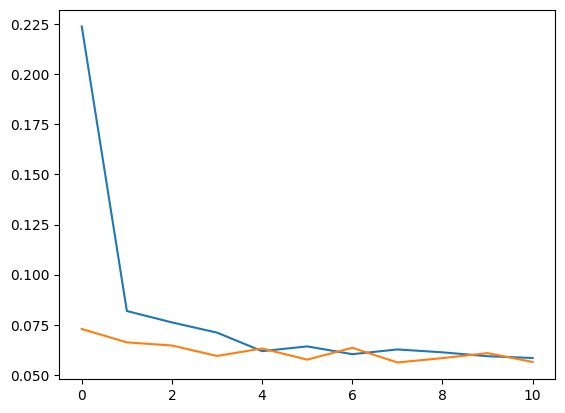

In [28]:
# Loss
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

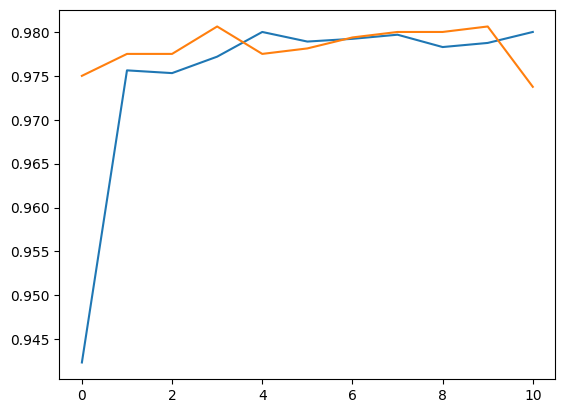

In [29]:
# Accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

63/63 [==============================] - 0s 3ms/step
Accuracy Score:  0.976
F1 Score:  0.9842105263157895


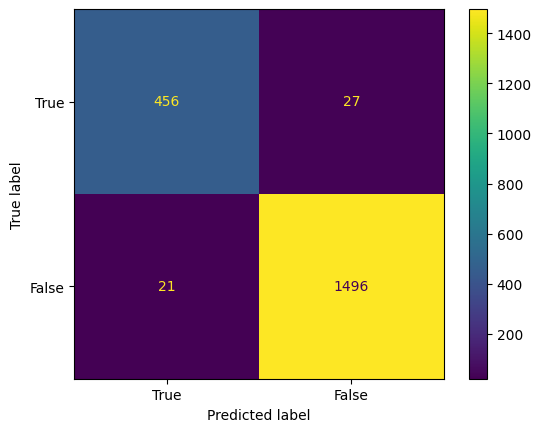

In [30]:
result = model.predict(x_test_scaled)
y_pred = np.where(result > 0.5, 1,0)
print("Accuracy Score: ",accuracy_score(y_test,y_pred))

cfm = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cfm, display_labels = [True, False]).plot() 
print("F1 Score: ",f1_score(y_test,y_pred))

In [32]:
# When it comes to Threat Link classification, model predicting a link as safe and actually turning out to be threat is more
# dangerous than model predicting as threat but actually the link was safe.So out of the 3 models, all are having good accuracy
# but inorder to reduce false negative as much as possible Model 2 (Random Forest) is selected.

In [33]:
import pickle

with open('Url classifier.pkl', 'wb') as pickle_file:
    pickle.dump(clf, pickle_file)